## Lead Scoring Case Study



### Step 1: Importing and Merging Data

In [1388]:
# Analysis
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [1389]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.max_rows",1000)

In [1390]:
# Importing all datasets
lead_score = pd.read_csv(r"C:\Users\parul\Downloads\Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,...,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000,674,2.500,...,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000,1532,2.000,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.000,20.000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000,305,1.000,...,No,Select,Mumbai,02.Medium,01.High,13.000,17.000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000,1428,1.000,...,No,Select,Mumbai,02.Medium,01.High,15.000,18.000,No,No,Modified


### Step 2: Inspecting the Dataframe

In [1391]:
# Let's see the head of our master dataset
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,...,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000,674,2.500,...,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000,1532,2.000,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.000,20.000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000,305,1.000,...,No,Select,Mumbai,02.Medium,01.High,13.000,17.000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000,1428,1.000,...,No,Select,Mumbai,02.Medium,01.High,15.000,18.000,No,No,Modified


In [1392]:
# Let's check the dimensions of the dataframe
lead_score.shape

(9240, 37)

In [1393]:
# let's look at the statistical aspects of the dataframe
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000,9240.000,9103.000,9240.000,9103.000,5022.000,5022.000
mean,617188.436,0.385,3.445,487.698,2.363,14.306,16.345
std,23405.996,0.487,4.855,548.021,2.161,1.387,1.811
min,579533.000,0.000,0.000,0.000,0.000,7.000,11.000
25%,596484.500,0.000,1.000,12.000,1.000,14.000,15.000
50%,615479.000,0.000,3.000,248.000,2.000,14.000,16.000
75%,637387.250,1.000,5.000,936.000,3.000,15.000,18.000
max,660737.000,1.000,251.000,2272.000,55.000,18.000,20.000


In [1394]:
# Let's see the type of each column
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation

In [1395]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,...,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000,674,2.500,...,No,Select,Select,02.Medium,02.Medium,15.000,15.000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000,1532,2.000,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.000,20.000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000,305,1.000,...,No,Select,Mumbai,02.Medium,01.High,13.000,17.000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000,1428,1.000,...,No,Select,Mumbai,02.Medium,01.High,15.000,18.000,No,No,Modified


In [1396]:
# Creating list for all Categorical Columns

imp_cat_cols=['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization',
                                'How did you hear about X Education','What is your current occupation',
                                'What matters most to you in choosing a course','Tags','Lead Quality',
                                'Lead Profile','City','Asymmetrique Activity Index','Last Notable Activity']



Lead Origin


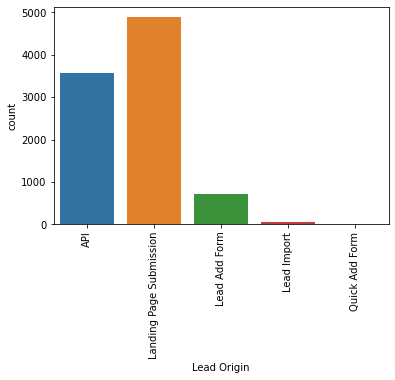

Lead Source


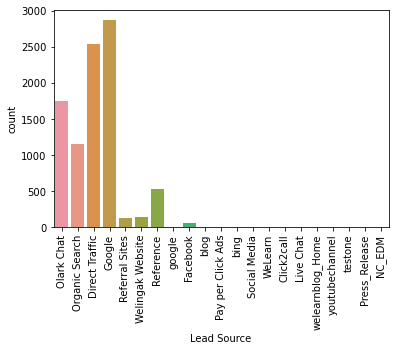

Last Activity


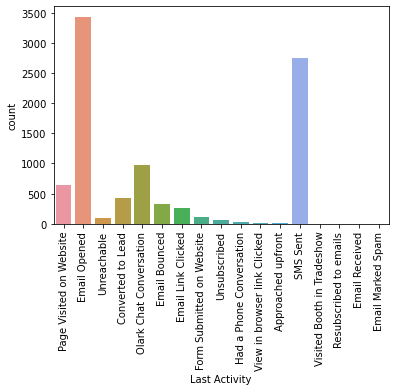

Country


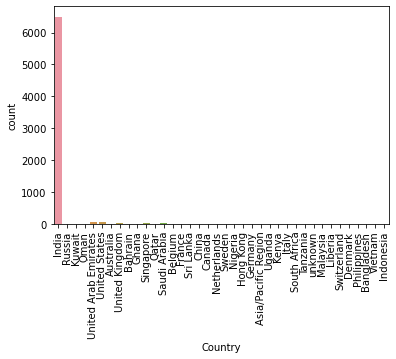

Specialization


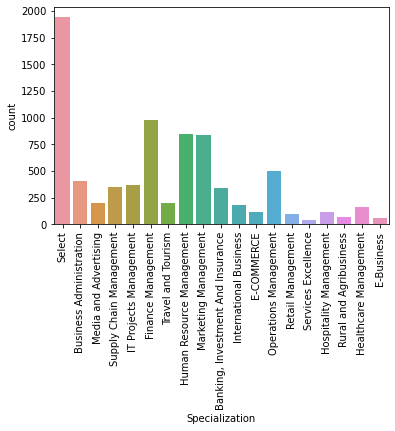

How did you hear about X Education


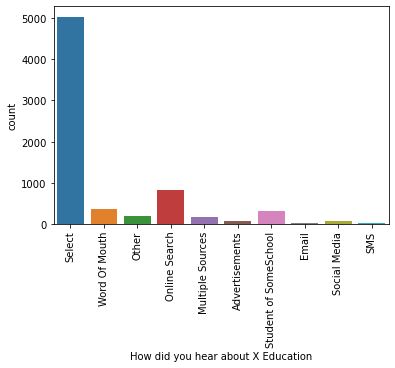

What is your current occupation


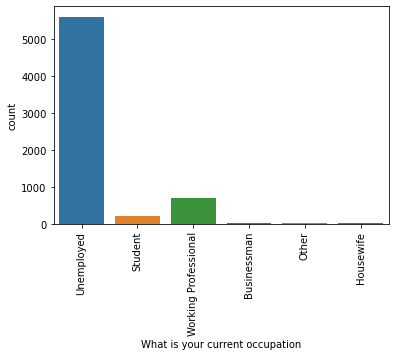

What matters most to you in choosing a course


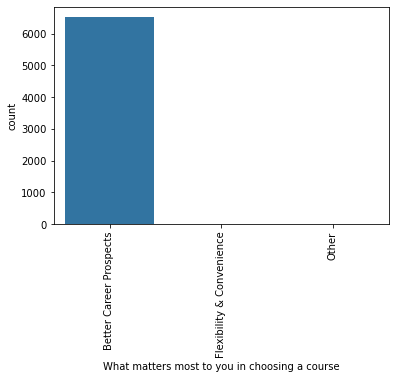

Tags


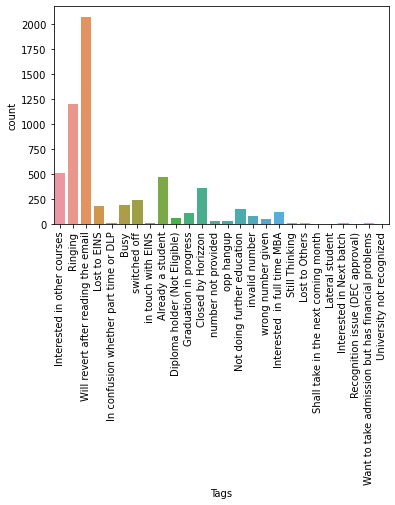

Lead Quality


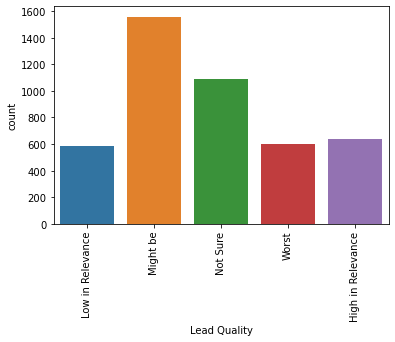

Lead Profile


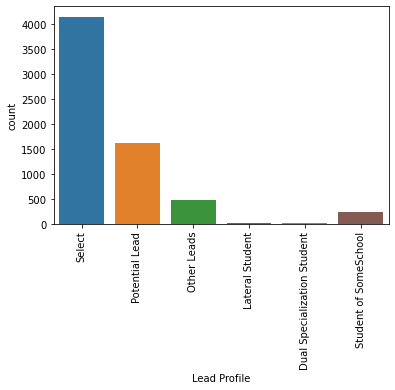

City


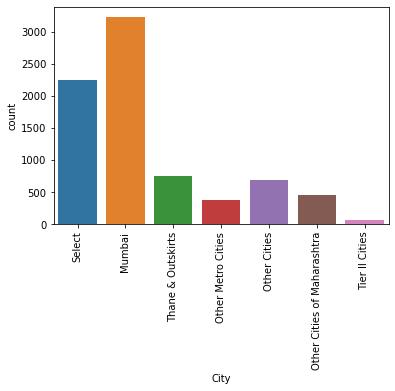

Asymmetrique Activity Index


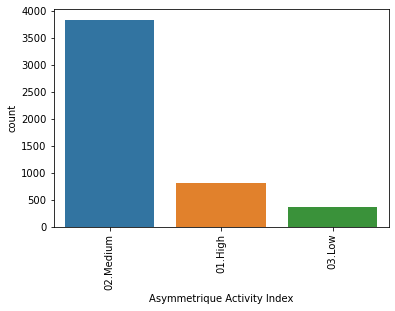

Last Notable Activity


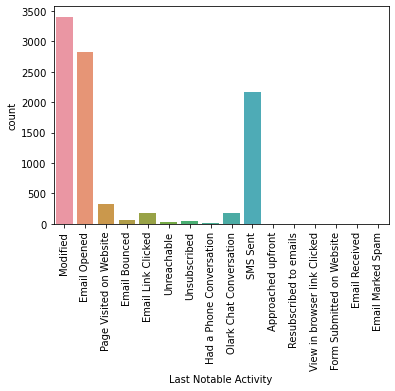

In [1397]:
for i in imp_cat_cols:
    print(i)
    plt.xticks(rotation=90)
    sns.countplot(lead_score[i])
    plt.show()

In [1398]:
## Fixing the 'Select' option in variable as it is equivalent to null
lead_score=lead_score.replace('Select',np.nan)

#### Checking for Missing Values and Inputing Them

In [1399]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1400]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,...,No,NaN,NaN,02.Medium,02.Medium,15.000,15.000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000,674,2.500,...,No,NaN,NaN,02.Medium,02.Medium,15.000,15.000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000,1532,2.000,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.000,20.000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000,305,1.000,...,No,NaN,Mumbai,02.Medium,01.High,13.000,17.000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000,1428,1.000,...,No,NaN,Mumbai,02.Medium,01.High,15.000,18.000,No,No,Modified


In [1401]:
###Identifying Missing Values Colums
mv=lead_score.isnull().mean().reset_index()
# Converting into percentage
mv[0] = mv[0] * 100
mv = mv.rename(columns={"index":"Column Name",0:"% Missing Values"})
mv.sort_values(by="% Missing Values", ascending=False)

,Column Name,% Missing Values
13,How did you hear about X Education,78.463
28,Lead Profile,74.188
25,Lead Quality,51.591
33,Asymmetrique Profile Score,45.649
32,Asymmetrique Activity Score,45.649
30,Asymmetrique Activity Index,45.649
31,Asymmetrique Profile Index,45.649
29,City,39.708
12,Specialization,36.580
24,Tags,36.288


In [1402]:
#Dropping Columns having high percentage(>45) of Missing Values
drop_cols=list(mv[mv["% Missing Values"]>45]["Column Name"])
lead_score1=lead_score.drop(drop_cols,axis=1)

In [1403]:
lead_score1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

Lead Origin


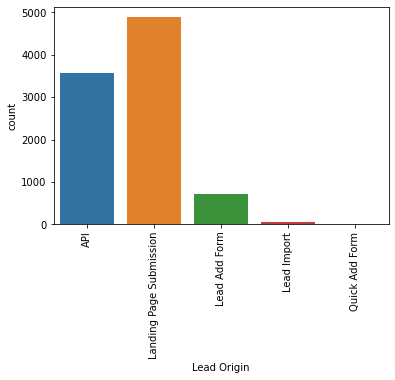

Lead Source


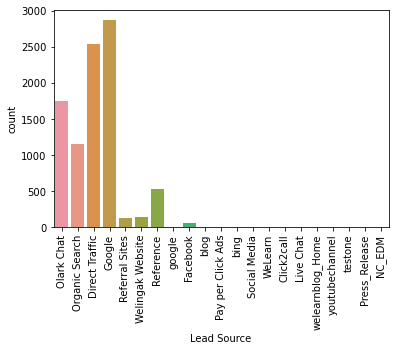

Last Activity


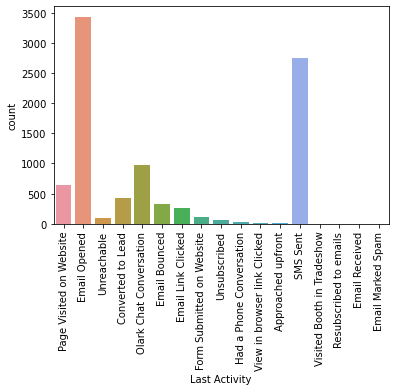

Country


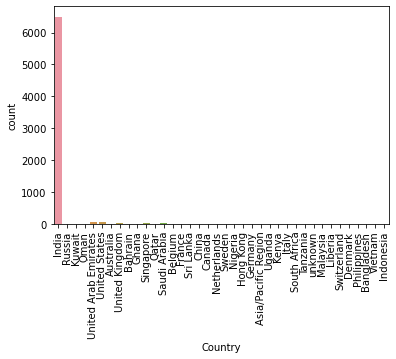

Specialization


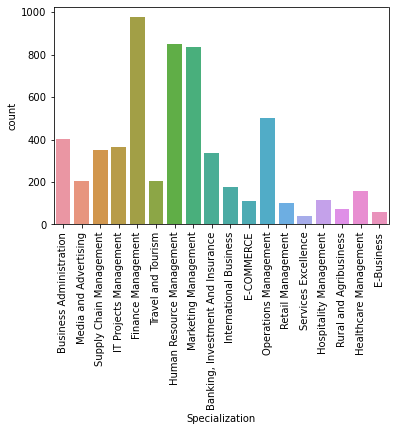

What is your current occupation


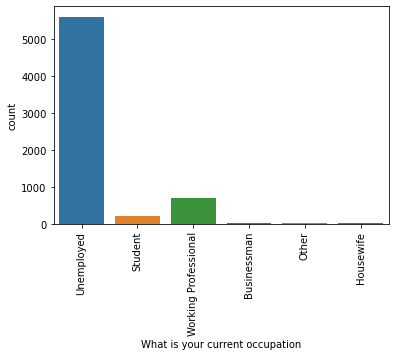

What matters most to you in choosing a course


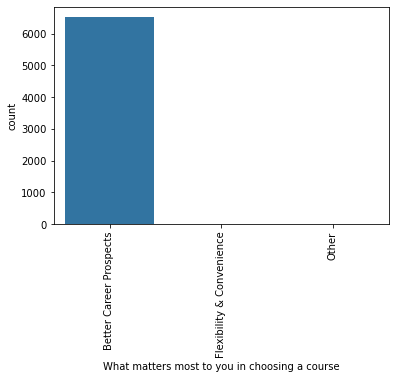

Tags


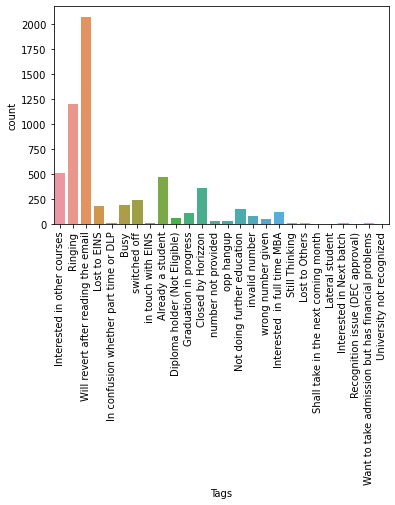

City


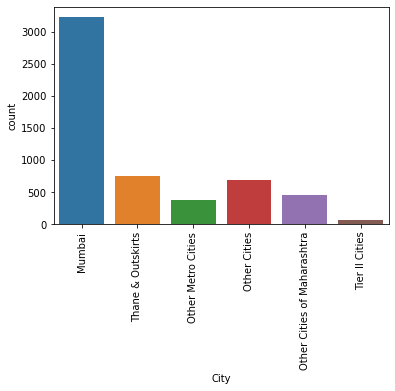

Last Notable Activity


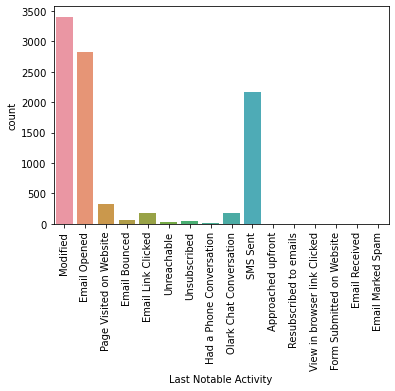

In [1404]:
#Checking and Analysing Values for Categorical variable replacement

cat_cols=['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization',
                                'What is your current occupation',
                                'What matters most to you in choosing a course','Tags',
                                'City','Last Notable Activity']



for i in cat_cols:
    print(i)
    plt.xticks(rotation=90)
    sns.countplot(lead_score1[i])
    plt.show()

## Imputing Values having percentage less than threshold

In [1405]:
#Specialization is having ~37% Missing value, so replacing this with "Others" Category

lead_score1['Specialization'] = lead_score1['Specialization'].replace(np.nan, 'Others')

In [1406]:
#Since variable('What matters most to you in choosing a course') has only one value so removing this variable

lead_score1=lead_score1.drop('What matters most to you in choosing a course',axis=1)

In [1407]:
#Handling/Imputing Missing Values for Categorical Columns
#Imputing below variable with the mode value
cat_cols=[ 'Country','What is your current occupation','Tags', 'City']
for i in cat_cols:
    if lead_score1[i].isnull().sum()>0:
        imp_val=lead_score1[i].mode()[0]
        lead_score1[i]=lead_score1[i].fillna(imp_val)

In [1408]:
# Finding the null percentages across columns after removing the above columns
round(lead_score1.isnull().sum()/len(lead_score1.index),2)*100

Prospect ID                                0.000
Lead Number                                0.000
Lead Origin                                0.000
Lead Source                                0.000
Do Not Email                               0.000
Do Not Call                                0.000
Converted                                  0.000
TotalVisits                                1.000
Total Time Spent on Website                0.000
Page Views Per Visit                       1.000
Last Activity                              1.000
Country                                    0.000
Specialization                             0.000
What is your current occupation            0.000
Search                                     0.000
Magazine                                   0.000
Newspaper Article                          0.000
X Education Forums                         0.000
Newspaper                                  0.000
Digital Advertisement                      0.000
Through Recommendati

In [1409]:
#Rest missing values are under 2% so we can drop these rows.
lead_score1.dropna(inplace = True)

In [1410]:
# Finding again the null percentages across columns after removing the above columns
round(lead_score1.isnull().sum()/len(lead_score1.index),2)*100

Prospect ID                                0.000
Lead Number                                0.000
Lead Origin                                0.000
Lead Source                                0.000
Do Not Email                               0.000
Do Not Call                                0.000
Converted                                  0.000
TotalVisits                                0.000
Total Time Spent on Website                0.000
Page Views Per Visit                       0.000
Last Activity                              0.000
Country                                    0.000
Specialization                             0.000
What is your current occupation            0.000
Search                                     0.000
Magazine                                   0.000
Newspaper Article                          0.000
X Education Forums                         0.000
Newspaper                                  0.000
Digital Advertisement                      0.000
Through Recommendati

Now we don't have any missing values

In [1411]:
# Checking if there are columns with one unique value since it won't affect our analysis
lead_score1.nunique()

Prospect ID                                 9074
Lead Number                                 9074
Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 17
Country                                       38
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendati

In [1412]:
# Dropping unique valued columns
lead_score1= lead_score1.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content',
              'Update me on Supply Chain Content'],axis=1)

In [1413]:
# Verifying again after dropping
lead_score1.nunique()

Prospect ID                               9074
Lead Number                               9074
Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                               17
Country                                     38
Specialization                              19
What is your current occupation              6
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Tags                                        26
City         

In [1414]:
lead_score1.shape

(9074, 24)

#### Checking for Outliers

In [1415]:
# Checking for outliers in the continuous variables
num_ls = lead_score1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [1416]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_ls.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000,9074.000,9074.000
mean,3.456,482.887,2.370
std,4.859,545.257,2.161
min,0.000,0.000,0.000
25%,1.000,11.000,1.000
50%,3.000,246.000,2.000
75%,5.000,922.750,3.200
90%,7.000,1373.000,5.000
95%,10.000,1557.000,6.000
99%,17.000,1839.000,9.000


From the distribution shown above, you can see that there are outliers in the data. The TotalVisits,Pages Views Per visit have the outliers.



Outlier Analysis for  TotalVisits
IQR: 4.0  Median: 3.0  upper_bound: 17.0


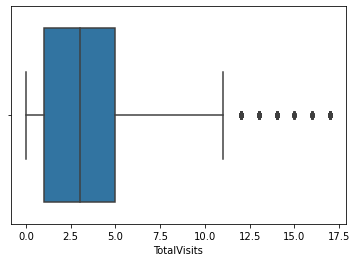

Outlier Analysis for  Page Views Per Visit
IQR: 2.2  Median: 2.0  upper_bound: 9.0


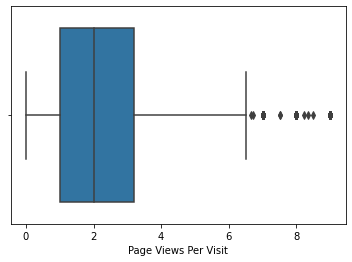

In [1417]:
#For Outlier Analysis/Treatment (Boxplot)
imp_cont_cols=['TotalVisits','Page Views Per Visit']

for i in imp_cont_cols:
    print("Outlier Analysis for ",i)
    q4,q3,q2, q1 = np.percentile(num_ls[i], [99,75,50,25])
    iqr = q3 - q1
    #lower_bound = q1 -1.5*iqr
    #upper_bound =q3 + 1.5 *iqr
    upper_bound =q4
    print ("IQR:" ,iqr," Median:",q2, " upper_bound:",upper_bound)
    num_ls[i]=np.where(num_ls[i]>upper_bound,upper_bound,num_ls[i])
    sns.boxplot(num_ls[i])
    plt.show()
    

In [1418]:
lead_score1.shape

(9074, 24)

In [1419]:
lead_score1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000,0,0.000,...,No,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000,674,2.500,...,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000,1532,2.000,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000,305,1.000,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000,1428,1.000,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [1420]:
lead_score1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Lead Origin


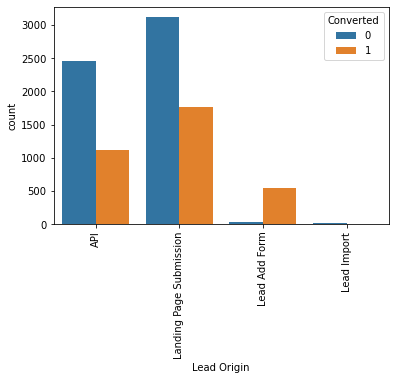

Lead Source


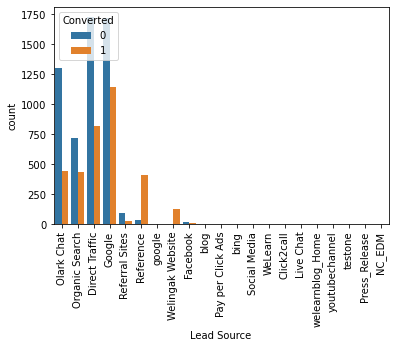

Do Not Email


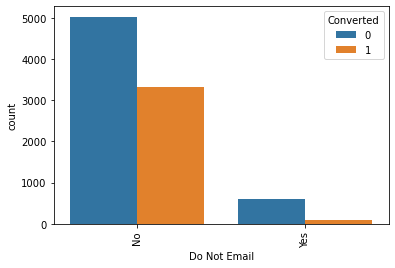

Do Not Call


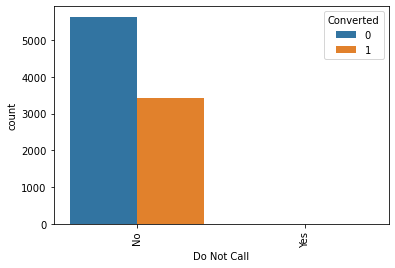

Last Activity


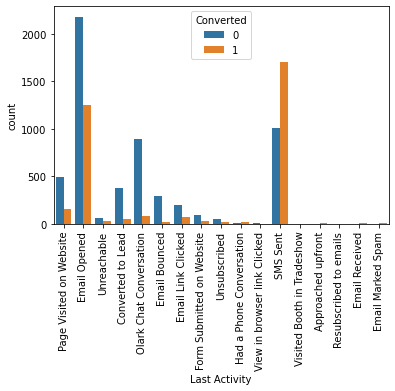

Country


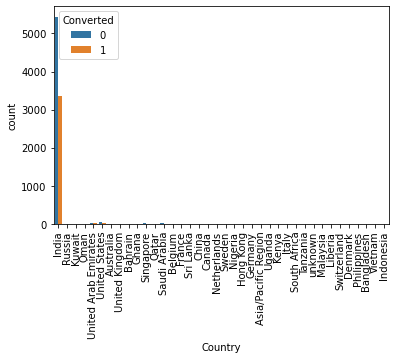

Specialization


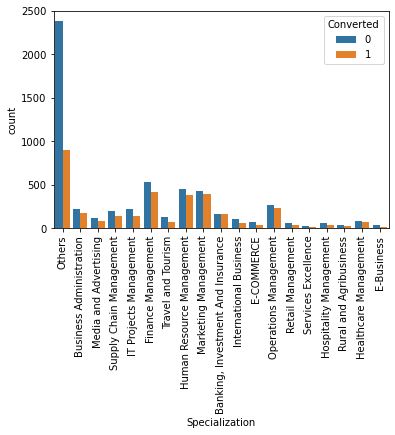

What is your current occupation


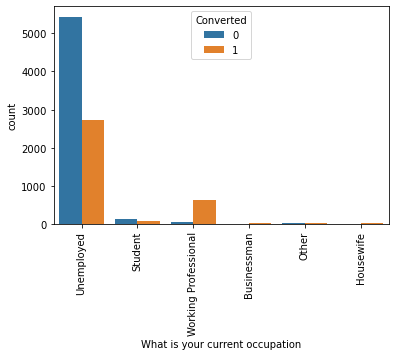

Search


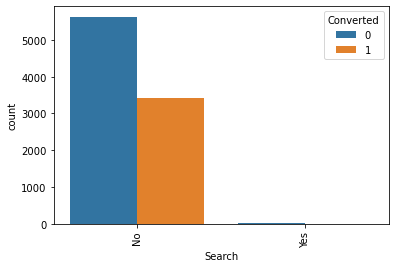

Newspaper Article


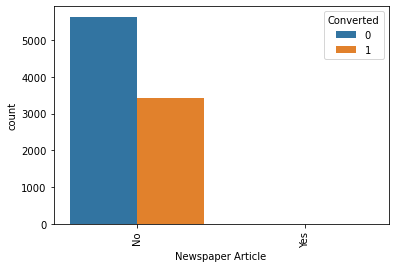

X Education Forums


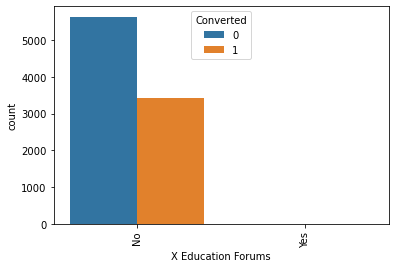

Newspaper


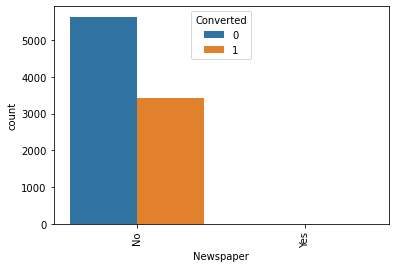

Digital Advertisement


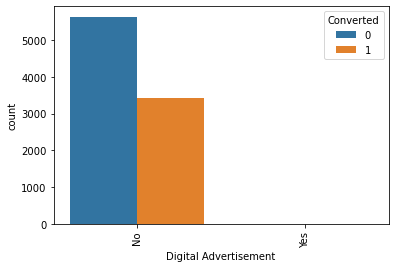

Through Recommendations


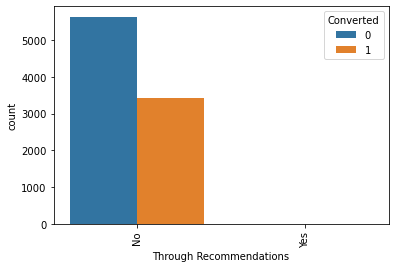

Tags


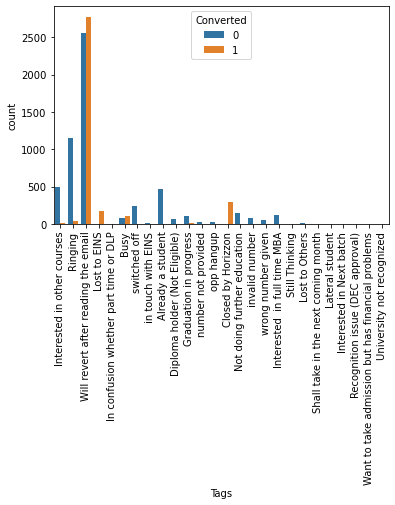

City


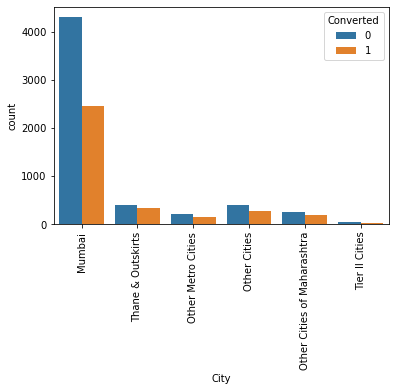

A free copy of Mastering The Interview


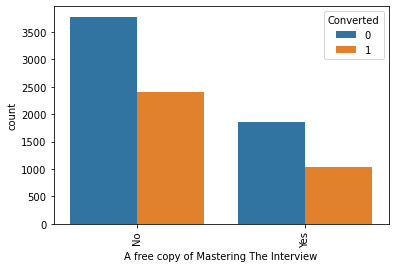

Last Notable Activity


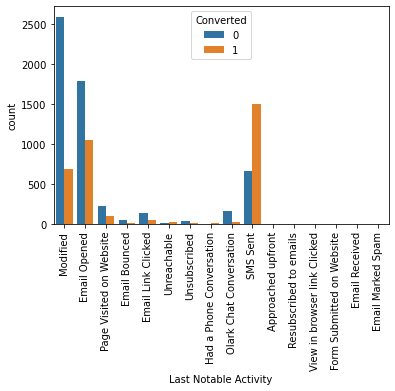

In [1421]:
###Bivariate Analysis for Categorical Columns wrt Converted
imp_cat_cols =['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags','City','A free copy of Mastering The Interview','Last Notable Activity']

for i in imp_cat_cols:
    print(i)
    plt.xticks(rotation=90)
    sns.countplot(lead_score1[i],hue=lead_score1.Converted)
    plt.show()

In [1422]:
#Lead Source need replacement for google and Google,also creating "Others" for value having low numbers
lead_score1['Lead Source'] = lead_score1['Lead Source'].replace(['google'], 'Google')
lead_score1['Lead Source'] = lead_score1['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [1423]:
lead_score1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1424]:
#Combining all the Management category in Specialization
lead_score1['Specialization'] = lead_score1['Specialization'].replace(['Finance Management','Healthcare Management','Hospitality Management','Human Resource Management','IT Projects Management','Marketing Management','Operations Management','Retail Management','Supply Chain Management'], 'Management')

In [1425]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_score1['Last Activity'] = lead_score1['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [1426]:
lead_score1 = lead_score1.drop(['Lead Number','Country','Search','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations',
                                    'Last Notable Activity'],1)

In [1427]:
lead_score1.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

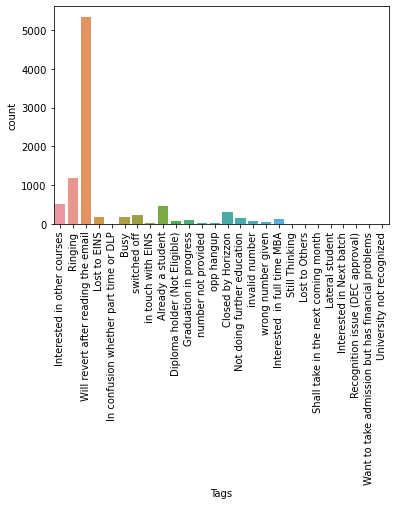

In [1428]:
plt.xticks(rotation=90)
sns.countplot(lead_score1['Tags'])
plt.show()

In [1429]:
lead_score1['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [1430]:
lead_score1['Tags'] = lead_score1['Tags'].replace(['Recognition issue (DEC approval)', 'University not recognized','Shall take in the next coming month','Lateral student','Interested in Next batch','In confusion whether part time or DLP','Want to take admission but has financial problems','Still Thinking','Lost to Others','in touch with EINS','number not provided','opp hangup','wrong number given','Diploma holder (Not Eligible)',
                                                  'invalid number','Graduation in progress',
                                                  'switched off','Busy','Ringing','Lost to EINS','Closed by Horizzon'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

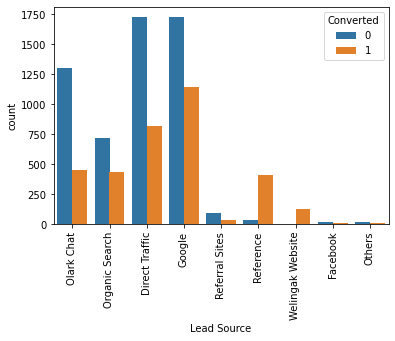

In [1431]:
#Verifying

sns.countplot(lead_score1['Lead Source'],hue=lead_score1.Converted)
plt.xticks(rotation = 90)

In [1433]:
lead_score1.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

Lead Origin


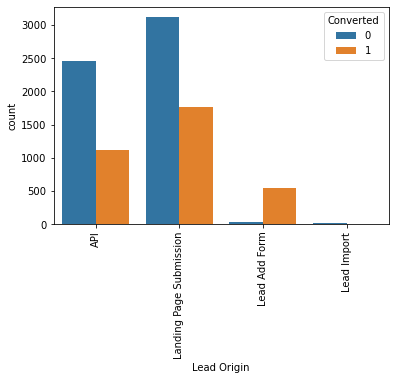

Lead Source


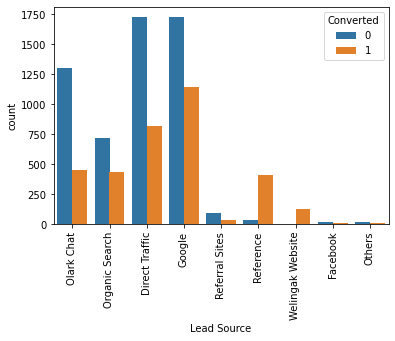

Do Not Email


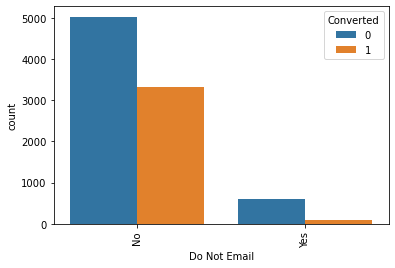

Do Not Call


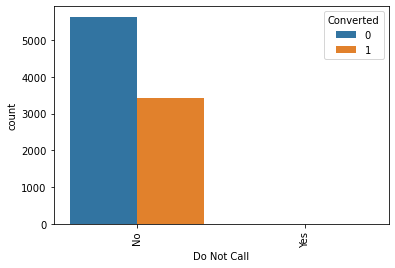

Last Activity


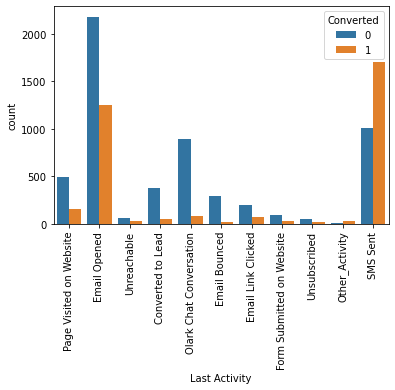

Specialization


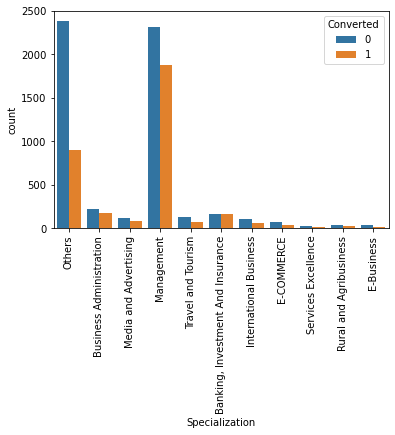

What is your current occupation


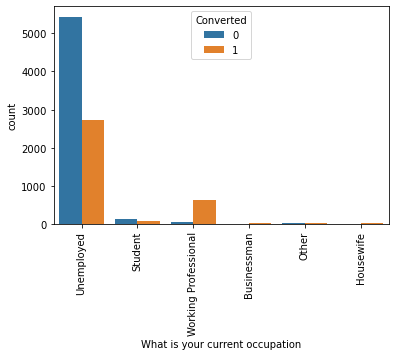

Tags


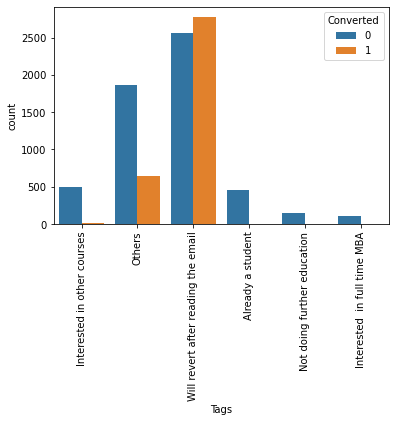

City


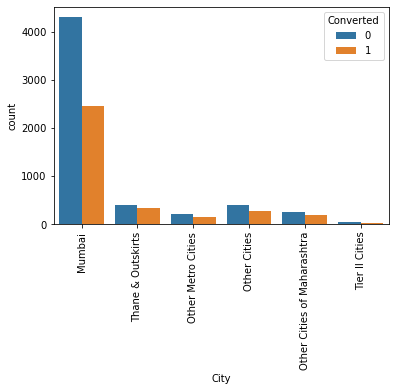

A free copy of Mastering The Interview


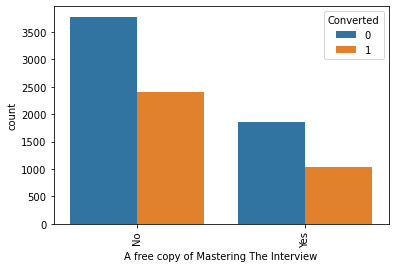

In [1436]:
###Bivariate Analysis for Categorical Columns wrt Converted after doing all value manipulation
imp_cat_cols =['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Specialization','What is your current occupation','Tags','City','A free copy of Mastering The Interview']

for i in imp_cat_cols:
    print(i)
    plt.xticks(rotation=90)
    sns.countplot(lead_score1[i],hue=lead_score1.Converted)
    plt.show()

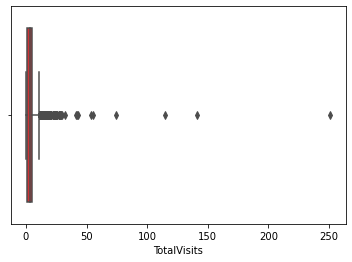

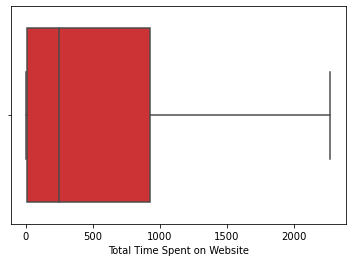

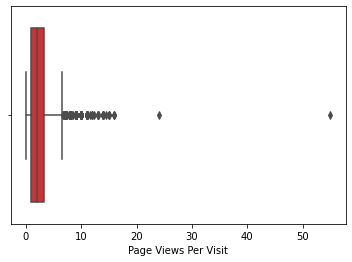

In [1437]:
# Analysis for Numerical Variable

imp_cont_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in imp_cont_cols:
    sns.boxplot(lead_score1[i],orient='vert',palette='Set1')
    plt.show()

In [1438]:
lead_score1.shape

(9074, 15)

Converting some binary variables (Yes/No) to 1/0

In [1439]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead list
lead_score1[varlist] = lead_score1[varlist].apply(binary_map)

In [1440]:
lead_score1.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [1441]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_score1[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Tags','A free copy of Mastering The Interview']], drop_first=True)
dummy1.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Others,Tags_Will revert after reading the email
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1442]:
# Adding the results to the master dataframe
lead_score1 = pd.concat([lead_score1, dummy1], axis=1)

In [1443]:
lead_score1.shape

(9074, 62)

#### Dropping the repeated variables

In [1444]:
# We have created dummies for the below variables, so we can drop them

lead_score1 = lead_score1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Tags','A free copy of Mastering The Interview'], axis = 1)



In [1445]:
lead_score1.shape

(9074, 53)

In [1446]:
lead_score1.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Others,Tags_Will revert after reading the email
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.000,0,0.000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.000,674,2.500,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.000,1532,2.000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.000,305,1.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.000,1428,1.000,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1447]:
lead_score1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Do Not Email                                          9074 non-null   int64  
 2   Do Not Call                                           9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9074

In [1448]:
lead_score1['Last Activity_Email Opened'].value_counts()

0    5642
1    3432
Name: Last Activity_Email Opened, dtype: int64

Now you can see that you have all variables as numeric.

In [1449]:
lead_score1.shape

(9074, 53)

### Step 4: Test-Train Split

In [1450]:
from sklearn.model_selection import train_test_split

In [1451]:
# Putting feature variable to X
X = lead_score1.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Others,Tags_Will revert after reading the email
0,0,0,0.000,0,0.000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.000,674,2.500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.000,1532,2.000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1.000,305,1.000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.000,1428,1.000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [1452]:
# Putting response variable to y
y = lead_score1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1453]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [1454]:
from sklearn.preprocessing import StandardScaler

In [1455]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Others,Tags_Will revert after reading the email
3009,0,0,-0.285,-0.160,-0.180,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1012,1,0,-0.285,-0.540,-0.180,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,0,-0.671,-0.889,-1.133,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4750,0,0,-0.285,1.643,-0.180,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7987,0,0,0.296,2.018,0.059,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [1456]:
### Checking the Conversion Rate
conv = (sum(lead_score1['Converted'])/len(lead_score1['Converted'].index))*100
conv

37.85541106458012

We have almost 38% conversion rate

### Step 6: Looking at Correlations

In [1457]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

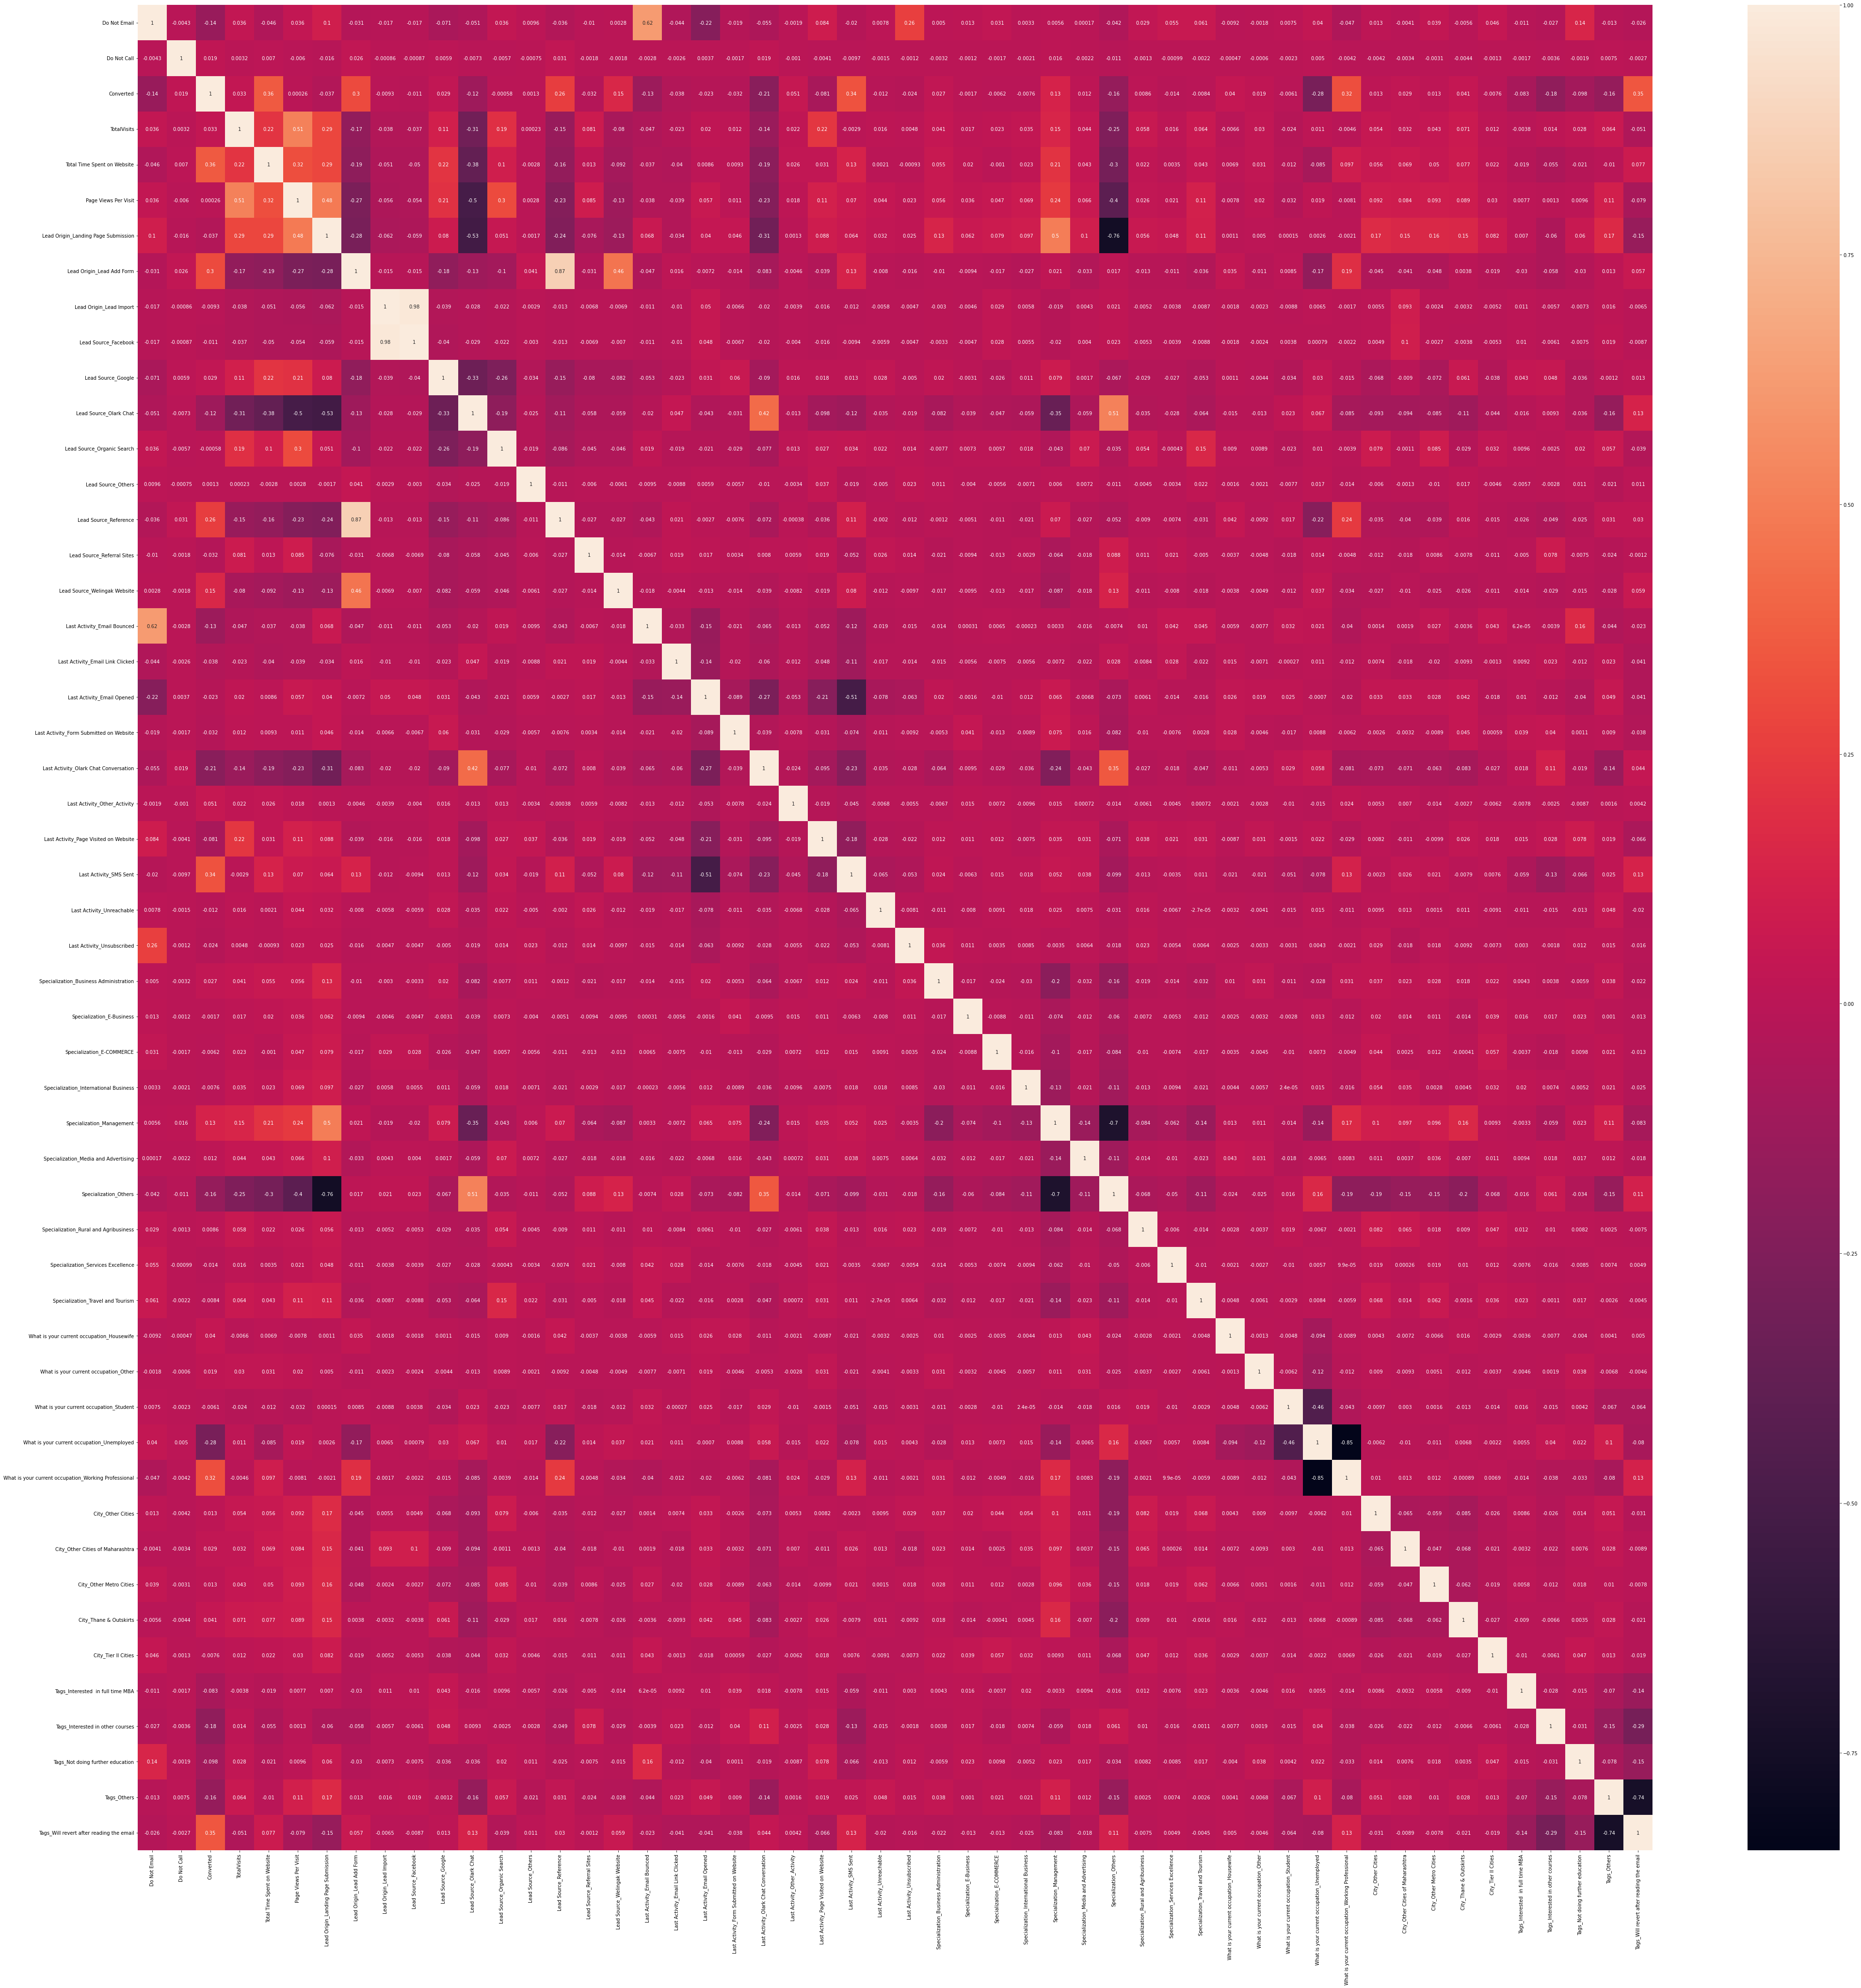

In [1458]:
# Let's see the correlation matrix 
plt.figure(figsize = (70,70))        # Size of the figure
sns.heatmap(lead_score1.corr(),annot = True)
plt.show()

### Step 7: Feature Selection Using RFE

In [1459]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1460]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train,y_train)

In [1461]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True])

In [1462]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', False, 30),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 35),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 9),
 ('Last Activity_SMS Sent', True, 1),


In [1463]:
cols = X_train.columns[rfe.support_]

In [1464]:
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Others',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Step 8: Model Building


#### Running First Training Model

In [1465]:
import statsmodels.api as sm

In [1466]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2296.1
Date:                Fri, 23 Dec 2022   Deviance:                       4592.2
Time:                        19:56:49   Pearson chi2:                 8.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4566
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5544      0.391     -3.980      0.000      -2.320      -0.789
Do Not Email                                            -1.9471      0.198     -9.827      0.000      -2.335      -1.559
Total Time Spent on Website                              0.9958      0.040     24.679      0.000       0.917       1.075
Lead Origin_Landing Page Submission                     -1.6297      0.137    -11.857      0.000      -1.899      -1.360
Lead Origin_Lead Add Form                                1.0441      0.892      1.170      0.242      -0.704       2.793
Lead Source_Reference                                    2.0383      0.921      2.213      0.027       0.233       3.844
Lead Source_Welingak Website                             4.2921      1.155      3.718      0.000       2.029       6.555
Last Activity_Olark Chat Conversation                   -1.1988      0.170     -7.035      0.000      -1.533      -0.865
Last Activity_Other_Activity                             2.4038      0.541      4.441      0.000       1.343       3.465
Last Activity_SMS Sent                                   1.2485      0.080     15.533      0.000       1.091       1.406
Last Activity_Unsubscribed                               1.6266      0.541      3.005      0.003       0.566       2.688
Specialization_Others                                   -1.4646      0.138    -10.579      0.000      -1.736      -1.193
What is your current occupation_Unemployed              -1.8242      0.315     -5.782      0.000      -2.443      -1.206
What is your current occupation_Working Professional     0.9538      0.385      2.477      0.013       0.199       1.709
Tags_Others                                              2.7692      0.300      9.223      0.000       2.181       3.358
Tags_Will revert after reading the email                 4.3508      0.296     14.697      0.000       3.771       4.931
========================================================================================================================
"""

In [1467]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.610
4,Lead Source_Reference,48.010
5,Lead Source_Welingak Website,15.480
11,What is your current occupation_Unemployed,12.620
14,Tags_Will revert after reading the email,5.620
2,Lead Origin_Landing Page Submission,5.360
10,Specialization_Others,3.960
13,Tags_Others,3.190
12,What is your current occupation_Working Profes...,1.950
8,Last Activity_SMS Sent,1.650


In [1468]:
# Dropping "Lead Origin_Lead Add Form" as very high VIF-value
col1 = cols.drop('Lead Origin_Lead Add Form')

##### Model 2 after dropping column

In [1469]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2296.8
Date:                Fri, 23 Dec 2022   Deviance:                       4593.7
Time:                        19:56:50   Pearson chi2:                 8.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4565
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5447      0.391     -3.955      0.000      -2.310      -0.779
Do Not Email                                            -1.9482      0.198     -9.832      0.000      -2.337      -1.560
Total Time Spent on Website                              0.9954      0.040     24.672      0.000       0.916       1.074
Lead Origin_Landing Page Submission                     -1.6427      0.137    -11.975      0.000      -1.912      -1.374
Lead Source_Reference                                    3.0743      0.253     12.150      0.000       2.578       3.570
Lead Source_Welingak Website                             5.3319      0.737      7.235      0.000       3.887       6.776
Last Activity_Olark Chat Conversation                   -1.2033      0.170     -7.063      0.000      -1.537      -0.869
Last Activity_Other_Activity                             2.4009      0.541      4.438      0.000       1.341       3.461
Last Activity_SMS Sent                                   1.2485      0.080     15.534      0.000       1.091       1.406
Last Activity_Unsubscribed                               1.6254      0.541      3.003      0.003       0.565       2.686
Specialization_Others                                   -1.4739      0.138    -10.656      0.000      -1.745      -1.203
What is your current occupation_Unemployed              -1.8249      0.316     -5.781      0.000      -2.444      -1.206
What is your current occupation_Working Professional     0.9514      0.385      2.469      0.014       0.196       1.707
Tags_Others                                              2.7741      0.300      9.238      0.000       2.186       3.363
Tags_Will revert after reading the email                 4.3550      0.296     14.707      0.000       3.775       4.935
========================================================================================================================
"""

In [1470]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,12.600
13,Tags_Will revert after reading the email,5.620
2,Lead Origin_Landing Page Submission,5.340
9,Specialization_Others,3.960
12,Tags_Others,3.180
11,What is your current occupation_Working Profes...,1.950
7,Last Activity_SMS Sent,1.650
3,Lead Source_Reference,1.380
5,Last Activity_Olark Chat Conversation,1.370
1,Total Time Spent on Website,1.200


In [1471]:
# Dropping "What is your current occupation_Unemployed" as very high VIF-value
col1 = col1.drop('What is your current occupation_Unemployed')

# Model 3

In [1472]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2314.8
Date:                Fri, 23 Dec 2022   Deviance:                       4629.6
Time:                        19:56:50   Pearson chi2:                 7.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4534
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1441      0.297    -10.571      0.000      -3.727      -2.561
Do Not Email                                            -1.9247      0.198     -9.739      0.000      -2.312      -1.537
Total Time Spent on Website                              0.9984      0.040     24.833      0.000       0.920       1.077
Lead Origin_Landing Page Submission                     -1.6131      0.137    -11.809      0.000      -1.881      -1.345
Lead Source_Reference                                    3.1010      0.251     12.332      0.000       2.608       3.594
Lead Source_Welingak Website                             5.3245      0.737      7.226      0.000       3.880       6.769
Last Activity_Olark Chat Conversation                   -1.2077      0.169     -7.147      0.000      -1.539      -0.877
Last Activity_Other_Activity                             2.3561      0.538      4.379      0.000       1.302       3.410
Last Activity_SMS Sent                                   1.2262      0.080     15.339      0.000       1.069       1.383
Last Activity_Unsubscribed                               1.5650      0.541      2.893      0.004       0.505       2.625
Specialization_Others                                   -1.4701      0.138    -10.627      0.000      -1.741      -1.199
What is your current occupation_Working Professional     2.7197      0.235     11.581      0.000       2.259       3.180
Tags_Others                                              2.5523      0.292      8.736      0.000       1.980       3.125
Tags_Will revert after reading the email                 4.1487      0.288     14.402      0.000       3.584       4.713
========================================================================================================================
"""

In [1473]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,3.900
2,Lead Origin_Landing Page Submission,3.200
9,Specialization_Others,2.680
11,Tags_Others,2.360
7,Last Activity_SMS Sent,1.650
5,Last Activity_Olark Chat Conversation,1.340
3,Lead Source_Reference,1.320
10,What is your current occupation_Working Profes...,1.220
1,Total Time Spent on Website,1.200
0,Do Not Email,1.180


### P-value are 0 and VIF is also less than 5 for all variables,so Model 3 is Final Model

## Making Predictions

In [1474]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009   0.317
1012   0.139
9226   0.151
4750   0.905
7987   0.738
1281   0.822
2880   0.184
4971   0.927
7536   0.894
1248   0.706
dtype: float64

In [1475]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31680654, 0.13909948, 0.15149984, 0.90537043, 0.73802865,
       0.82244018, 0.18416241, 0.92657508, 0.89356093, 0.70607109])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [1476]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()




,Converted,Conversion_Prob
0,0,0.317
1,0,0.139
2,0,0.151
3,1,0.905
4,1,0.738


In [1477]:
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.317,3009
1,0,0.139,1012
2,0,0.151,9226
3,1,0.905,4750
4,1,0.738,7987


##### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [1478]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,0,0.317,3009,0
1,0,0.139,1012,0
2,0,0.151,9226,0
3,1,0.905,4750,1
4,1,0.738,7987,1


# Model Evaluation

In [1479]:
from sklearn import metrics

In [1480]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3505,  400],
       [ 631, 1815]], dtype=int64)

In [1481]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3505      400
# converted            631       1815 

In [1482]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8376633601007716


## Metrics beyond simply accuracy

In [1483]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1484]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7420278004905969

In [1485]:
# Let us calculate specificity
TN / float(TN+FP)

0.8975672215108835

In [1486]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10243277848911651


In [1487]:
# positive predictive value 
print (TP / float(TP+FP))

0.8194130925507901


In [1488]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8474371373307543


##### We found out that our Accuracy is (~ 84%) and specificity is (~90%)

## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1489]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1490]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

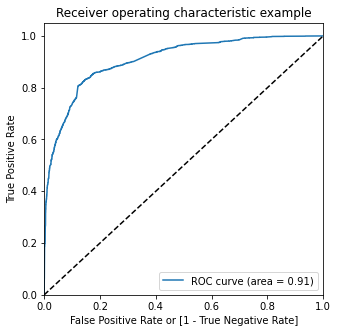

In [1491]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1492]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.317,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.139,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.151,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.905,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.738,7987,1,1,1,1,1,1,1,1,1,0,0


In [1493]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.000,0.000,0.385,1.000,0.000
0.100,0.100,0.685,0.964,0.511
0.200,0.200,0.738,0.932,0.616
0.300,0.300,0.826,0.861,0.805
0.400,0.400,0.845,0.828,0.856
0.500,0.500,0.838,0.742,0.898
0.600,0.600,0.827,0.661,0.931
0.700,0.700,0.818,0.595,0.957
0.800,0.800,0.794,0.498,0.980
0.900,0.900,0.750,0.363,0.992


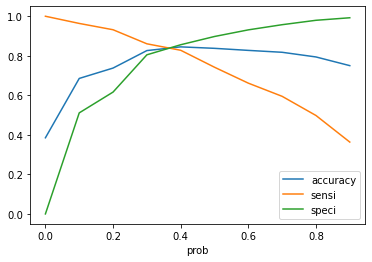

In [1494]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [1495]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.317,3009,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.139,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.151,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.905,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.738,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [1496]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8438041253345929

### Assigning Lead Score to Training Set

In [1497]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.317,3009,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.139,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.151,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.905,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.738,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [1498]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.317,3009,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.139,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.151,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.905,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.738,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [1499]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3323,  582],
       [ 410, 2036]], dtype=int64)

In [1500]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1501]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8323793949304987

In [1502]:
# Let us calculate specificity
TN / float(TN+FP)

0.8509603072983355

In [1503]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14903969270166453


In [1504]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7776928953399541


In [1505]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8901687650683097


## Precision and Recall

In [1506]:
#Looking at the confusion matrix again

In [1507]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3505,  400],
       [ 631, 1815]], dtype=int64)

##### Precision
TP / TP + FP

In [1508]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8194130925507901

##### Recall
TP / TP + FN

In [1509]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7420278004905969

Using sklearn utilities for the same

In [1510]:
from sklearn.metrics import precision_score, recall_score

In [1511]:
#?precision_score

In [1512]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8194130925507901

In [1513]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7420278004905969

### Precision and recall tradeoff

In [1514]:
from sklearn.metrics import precision_recall_curve

In [1515]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    1
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [1516]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

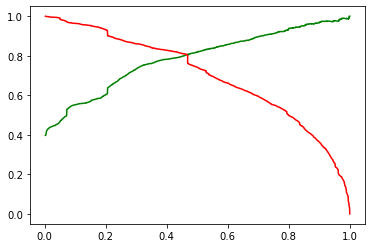

In [1517]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [1518]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [1519]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Tags_Others,Tags_Will revert after reading the email
3271,0,-0.601,0,0,0,0,0,0,0,1,0,0,1
1490,0,1.887,1,0,0,0,0,0,0,0,1,0,1
7936,0,-0.753,0,0,0,0,0,0,0,1,0,0,1
4216,0,-0.889,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.588,1,0,0,0,0,0,0,0,0,0,1


In [1520]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [1521]:
y_test_pred = res.predict(X_test_sm)

In [1522]:
y_test_pred[:10]

3271   0.256
1490   0.982
7936   0.228
4216   0.835
3830   0.232
1800   0.796
6507   0.164
4821   0.137
4223   0.951
4714   0.468
dtype: float64

In [1523]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1524]:
# Let's see the head
y_pred_1.head()

,0
3271,0.256
1490,0.982
7936,0.228
4216,0.835
3830,0.232


In [1525]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1526]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1527]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1528]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1529]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.256
1,1,1490,0.982
2,0,7936,0.228
3,1,4216,0.835
4,0,3830,0.232


In [1530]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1531]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [1532]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.256
1,1490,1,0.982
2,7936,0,0.228
3,4216,1,0.835
4,3830,0,0.232


In [1533]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [1534]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.256,0
1,1490,1,0.982,1
2,7936,0,0.228,0
3,4216,1,0.835,1
4,3830,0,0.232,0


In [1535]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8362100624311422

In [1536]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1475,  259],
       [ 187,  802]], dtype=int64)

In [1537]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1538]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8109201213346815

In [1539]:
# Let us calculate specificity
TN / float(TN+FP)

0.850634371395617

In [1540]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.256,0
1,1490,1,0.982,1
2,7936,0,0.228,0
3,4216,1,0.835,1
4,3830,0,0.232,0


In [1541]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1542]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

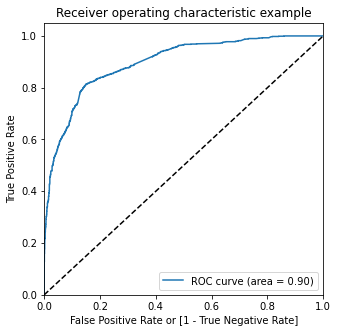

In [1543]:
# Call the ROC function
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

### Assgning Lead Score to Test set

In [1544]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,3271,0,0.256,0,26
1,1490,1,0.982,1,98
2,7936,0,0.228,0,23
3,4216,1,0.835,1,84
4,3830,0,0.232,0,23


### Leads which should be contacted

In [1545]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1,1490,1,0.982,1,98
8,4223,1,0.951,1,95
16,1946,1,0.915,1,92
21,2461,1,0.995,1,99
23,5822,1,0.999,1,100
25,2684,1,0.999,1,100
30,2010,1,0.992,1,99
33,4062,1,0.989,1,99
35,7696,1,0.949,1,95
36,9049,1,0.970,1,97


In [1546]:
hot_leads.shape

(448, 5)

### Important features from our Final Model are below

In [1547]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.325
Tags_Will revert after reading the email                4.149
Lead Source_Reference                                   3.101
What is your current occupation_Working Professional    2.720
Tags_Others                                             2.552
Last Activity_Other_Activity                            2.356
Last Activity_Unsubscribed                              1.565
Last Activity_SMS Sent                                  1.226
Total Time Spent on Website                             0.998
Last Activity_Olark Chat Conversation                  -1.208
Specialization_Others                                  -1.470
Lead Origin_Landing Page Submission                    -1.613
Do Not Email                                           -1.925
const                                                  -3.144
dtype: float64

### Comparison of Train and Test

### Recommendations